In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re

%matplotlib inline

pd.set_option('precision', 2)
pd.set_option('max_rows', 300)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
orig_train = pd.read_csv('/Users/rbekbolatov/data/kaggle/homedepot/train.csv')
orig_test = pd.read_csv('/Users/rbekbolatov/data/kaggle/homedepot/test.csv')
orig_descr = pd.read_csv('/Users/rbekbolatov/data/kaggle/homedepot/product_descriptions.csv')
orig_attr = pd.read_csv('/Users/rbekbolatov/data/kaggle/homedepot/attributes.csv')

In [37]:
split_pattern = re.compile('[^0-9a-z]')
split_patternintra = re.compile('(\d+)')

def clean_text(s):
    if isinstance(s, str):
        xss = [x for x in split_pattern.split(s.lower().strip()) if x]
        xss = [x for xs in xss for x in split_patternintra.split(xs) if x]
        return xss
    else:
        return s

orig_train['product_title'] = orig_train.product_title.apply(clean_text)
orig_train['search_term'] = orig_train.search_term.apply(clean_text)

orig_test['product_title'] = orig_test.product_title.apply(clean_text)
orig_test['search_term'] = orig_test.search_term.apply(clean_text)

orig_descr['product_description'] = orig_descr['product_description'].apply(clean_text)

orig_attr['name'] = orig_attr['name'].apply(clean_text)
orig_attr['value'] = orig_attr['value'].apply(clean_text)

In [32]:
split_pattern.split('gf df')
split_patternintra.split('r3')

['r', '3', '']

In [33]:
orig_train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,"[simpson, strong, tie, , 12, , gauge, angle]","[angle, bracket]",3.00
1,3,100001,"[simpson, strong, tie, , 12, , gauge, angle]","[l, bracket]",2.50
2,9,100002,"[behr, premium, textured, deckover, , 1, , gal...","[deck, over]",3.00
3,16,100005,"[delta, vero, , 1, , handle, shower, only, fau...","[rain, shower, head]",2.33
4,17,100005,"[delta, vero, , 1, , handle, shower, only, fau...","[shower, only, faucet]",2.67


In [26]:
orig_test.head()

,id,product_uid,product_title,search_term
0,1,100001,"[simpson, strong, tie, 12, gauge, angle]","[90, degree, bracket]"
1,4,100001,"[simpson, strong, tie, 12, gauge, angle]","[metal, l, brackets]"
2,5,100001,"[simpson, strong, tie, 12, gauge, angle]","[simpson, sku, able]"
3,6,100001,"[simpson, strong, tie, 12, gauge, angle]","[simpson, strong, , ties]"
4,7,100001,"[simpson, strong, tie, 12, gauge, angle]","[simpson, strong, tie, hcc668]"


In [27]:
orig_descr.head()

,product_uid,product_description
0,100001,"[not, only, do, angles, make, joints, stronger..."
1,100002,"[behr, premium, textured, deckover, is, an, in..."
2,100003,"[classic, architecture, meets, contemporary, d..."
3,100004,"[the, grape, solar, 265, watt, polycrystalline..."
4,100005,"[update, your, bathroom, with, the, delta, ver..."


In [28]:
orig_attr.head()

,product_uid,name,value
0,"100,001.00",[bullet01],"[versatile, connector, for, various, 90, , , c..."
1,"100,001.00",[bullet02],"[stronger, than, angled, nailing, or, screw, f..."
2,"100,001.00",[bullet03],"[help, ensure, joints, are, consistently, stra..."
3,"100,001.00",[bullet04],"[dimensions, , 3, in, , x, 3, in, , x, 1, 1, 2..."
4,"100,001.00",[bullet05],"[made, from, 12, gauge, steel]"


In [38]:
orig_train[orig_train.relevance == 3.0]

,id,product_uid,product_title,search_term,relevance
0,2,100001,"[simpson, strong, tie, 12, gauge, angle]","[angle, bracket]",3.00
2,9,100002,"[behr, premium, textured, deckover, 1, gal, sc...","[deck, over]",3.00
5,18,100006,"[whirlpool, 1, 9, cu, ft, over, the, range, co...","[convection, otr]",3.00
7,21,100006,"[whirlpool, 1, 9, cu, ft, over, the, range, co...",[microwaves],3.00
9,27,100009,"[house, of, fara, 3, 4, in, x, 3, in, x, 8, ft...","[mdf, 3, 4]",3.00
11,35,100011,"[toro, personal, pace, recycler, 22, in, varia...","[briggs, and, stratton, lawn, mower]",3.00
12,37,100011,"[toro, personal, pace, recycler, 22, in, varia...","[gas, mowe]",3.00
16,65,100016,"[sunjoy, calais, 8, ft, x, 5, ft, x, 8, ft, st...","[grill, gazebo]",3.00
32,123,100023,"[quikrete, 80, lb, crack, resistant, concrete]","[concrete, masonry, cleaner, etcher]",3.00
43,162,100029,"[decoart, americana, decor, 16, oz, whisper, c...","[chalk, paint]",3.00


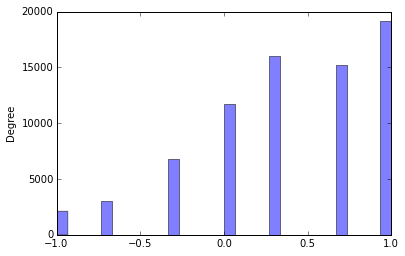

In [30]:
(orig_train.relevance-2).plot(kind='hist', alpha=0.5, bins=30)
plt.show()

In [26]:
orig_descr[orig_descr.product_uid == 180282]

,product_uid,product_description
80281,180282,Rust-Oleum Painter's Touch Ultra Cover 2X 12 o...


In [4]:
df_brand = orig_attr[orig_attr.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand"})

In [6]:
len(df_brand)

86250

In [7]:
len(orig_descr)

124428

In [32]:
(orig_train.relevance - 0).value_counts()

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
dtype: int64

,product_uid,name,value
0,"100,001.00",Bullet01,Versatile connector for various 90° connection...
1,"100,001.00",Bullet02,Stronger than angled nailing or screw fastenin...
2,"100,001.00",Bullet03,Help ensure joints are consistently straight a...
3,"100,001.00",Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,"100,001.00",Bullet05,Made from 12-Gauge steel
15,"100,002.00",Application Method,"Brush,Roller,Spray"
16,"100,002.00",Assembled Depth (in.),6.63 in
17,"100,002.00",Assembled Height (in.),7.76 in
18,"100,002.00",Assembled Width (in.),6.63 in
19,"100,002.00",Bullet01,"Revives wood and composite decks, railings, po..."


In [36]:
orig_train.merge(orig_attr, how='left', on='product_uid').merge(orig_descr, how='left', on='product_uid')

,id,product_uid,product_title,search_term,relevance,name,value,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet01,Versatile connector for various 90° connection...,"Not only do angles make joints stronger, they ..."
1,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet02,Stronger than angled nailing or screw fastenin...,"Not only do angles make joints stronger, they ..."
2,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet03,Help ensure joints are consistently straight a...,"Not only do angles make joints stronger, they ..."
3,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.,"Not only do angles make joints stronger, they ..."
4,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet05,Made from 12-Gauge steel,"Not only do angles make joints stronger, they ..."
5,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet06,Galvanized for extra corrosion resistance,"Not only do angles make joints stronger, they ..."
6,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Bullet07,Install with 10d common nails or #9 x 1-1/2 in...,"Not only do angles make joints stronger, they ..."
7,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Gauge,12,"Not only do angles make joints stronger, they ..."
8,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Material,Galvanized Steel,"Not only do angles make joints stronger, they ..."
9,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,MFG Brand Name,Simpson Strong-Tie,"Not only do angles make joints stronger, they ..."


In [41]:
orig_train

,id,product_uid,product_title,search_term,relevance
0,2,100001,simpson strong-tie 12-gauge angle,angle bracket,3.00
1,3,100001,simpson strong-tie 12-gauge angle,l bracket,2.50
2,9,100002,behr premium textured deckover 1-gal. #sc-141 ...,deck over,3.00
3,16,100005,delta vero 1-handle shower only faucet trim ki...,rain shower head,2.33
4,17,100005,delta vero 1-handle shower only faucet trim ki...,shower only faucet,2.67
5,18,100006,whirlpool 1.9 cu. ft. over the range convectio...,convection otr,3.00
6,20,100006,whirlpool 1.9 cu. ft. over the range convectio...,microwave over stove,2.67
7,21,100006,whirlpool 1.9 cu. ft. over the range convectio...,microwaves,3.00
8,23,100007,lithonia lighting quantum 2-light black led em...,emergency light,2.67
9,27,100009,house of fara 3/4 in. x 3 in. x 8 ft. mdf flut...,mdf 3/4,3.00
